In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score , recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabhack10/Week5_train.csv
/kaggle/input/tabhack10/Week5_test.csv


### I am commenting out the most of the code otherwise it will take more than 3-4 hours to commit the notebook. You can edit this notebook and uncomment the cells to try. 

**I like to use this simple time function to measure the time taken by algorithms to run :)**

In [2]:
from datetime import datetime


def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

#### Maybe better EDA can be performed on this dataset. I learned many new techniques but tried with the previous knowledge. Feature Engineering was not helping out with this dataset.

#### I would prefer to combine train and test dataset and then apply the methods to prepare the data, but I haven't done it in this notebook.

In [3]:
df_train = pd.read_csv('../input/tabhack10/Week5_train.csv')
df_train.head(5)

,id,Age,Working_class,fnlwgt,education,education_num,marital_status,Occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,earning
0,0,37,Private,280966,Bachelors,13,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,0
1,1,41,Private,205153,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,23,Private,237720,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,38,United-States,1
3,3,35,Private,276153,Bachelors,13,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Female,4650,0,40,United-States,1
4,4,28,Private,216178,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,1


In [4]:
df_test = pd.read_csv('../input/tabhack10/Week5_test.csv')
df_test.head(5)

,id,Age,Working_class,fnlwgt,education,education_num,marital_status,Occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,0,34,Private,174789,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States
1,1,38,Private,181943,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,35,United-States
2,2,45,Private,175625,HS-grad,9,Separated,Adm-clerical,Unmarried,White,Female,0,0,38,United-States
3,3,20,Private,121023,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,15,United-States
4,4,41,Local-gov,81054,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Female,0,0,25,United-States


In [5]:
df_train.shape

(13842, 16)

In [6]:
df_test.shape

(13840, 15)

In [7]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13842 entries, 0 to 13841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              13842 non-null  int64 
 1   Age             13842 non-null  int64 
 2   Working_class   13842 non-null  object
 3   fnlwgt          13842 non-null  int64 
 4   education       13842 non-null  object
 5   education_num   13842 non-null  int64 
 6   marital_status  13842 non-null  object
 7   Occupation      13842 non-null  object
 8   relationship    13842 non-null  object
 9   race            13842 non-null  object
 10  gender          13842 non-null  object
 11  capital_gain    13842 non-null  int64 
 12  capital_loss    13842 non-null  int64 
 13  hours_per_week  13842 non-null  int64 
 14  native_country  13842 non-null  object
 15  earning         13842 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [8]:
df_train.isnull().sum()

id                0
Age               0
Working_class     0
fnlwgt            0
education         0
education_num     0
marital_status    0
Occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
earning           0
dtype: int64

In [9]:
df_test.isnull().sum()

id                0
Age               0
Working_class     0
fnlwgt            0
education         0
education_num     0
marital_status    0
Occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

#### Because the null values are replaced by question mark and also I was not sure that in all the columns null values is being replaced by question mark. So, I used the value count function to see which columns have question mark as null values.

In [10]:
df_train.Working_class.value_counts()
# df_train.education.value_counts()
# df_train.education_num.value_counts()
# df_train.marital_status.value_counts()
# df_train.Occupation.value_counts()
# df_train.relationship.value_counts()
# df_train.race.value_counts()
# df_train.gender.value_counts()
# df_train.capital_gain.value_counts()
# df_train.capital_loss.value_counts()
# df_train.hours_per_week.value_counts()
# df_train.native_country.value_counts()
# df_train.earning.value_counts()

 Private             9386
 Self-emp-not-inc    1142
 Local-gov            950
 ?                    666
 Self-emp-inc         628
 State-gov            582
 Federal-gov          484
 Without-pay            4
Name: Working_class, dtype: int64

<AxesSubplot:>

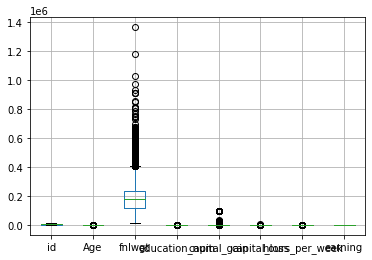

In [11]:
df_train.boxplot()

In [12]:
df_train.native_country = df_train.native_country.replace([' ?'],' United-States')
df_test.native_country = df_test.native_country.replace([' ?'],' United-States')
# df.loc[df['native_country'] == "?","native_country"] = "United-States"

In [13]:
df_train.Working_class = df_train.Working_class.replace([' ?'],' Private')
df_test.Working_class = df_test.Working_class.replace([' ?'],' Private')

In [14]:
df_train.Occupation = df_train.Occupation.replace([' ?'],' Prof-specialty')
df_test.Occupation = df_test.Occupation.replace([' ?'],' Prof-specialty')

In [15]:
id = df_test['id']
df_train = df_train.drop(['id','fnlwgt','education'], axis = 1)
df_test = df_test.drop(['id','fnlwgt','education'], axis = 1)

### Label Encoding the categorical features by pandas dummies method

#### I would prefer OHE here but to keep things simple done this way

In [16]:
train_final = pd.get_dummies(df_train, drop_first = True)
test_final = pd.get_dummies(df_test, drop_first = True)

In [17]:
train_final.columns

Index(['Age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'earning', 'Working_class_ Local-gov',
       'Working_class_ Private', 'Working_class_ Self-emp-inc',
       'Working_class_ Self-emp-not-inc', 'Working_class_ State-gov',
       'Working_class_ Without-pay', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'Occupation_ Armed-Forces',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       'Occupation_ Farming-fishing', 'Occupation_ Handlers-cleaners',
       'Occupation_ Machine-op-inspct', 'Occupation_ Other-service',
       'Occupation_ Priv-house-serv', 'Occupation_ Prof-specialty',
       'Occupation_ Protective-serv', 'Occupation_ Sales',
       'Occupation_ Tech-support', 'Occupation_ Transport-moving',
       'relationship_ Not-in-family', 're

In [18]:
X = train_final.drop(['earning'], axis = 1)
y = train_final.earning

In [19]:
X

,Age,education_num,capital_gain,capital_loss,hours_per_week,Working_class_ Local-gov,Working_class_ Private,Working_class_ Self-emp-inc,Working_class_ Self-emp-not-inc,Working_class_ State-gov,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,37,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,41,11,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,23,13,0,0,38,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,35,13,4650,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13837,48,9,0,0,45,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13838,37,15,0,0,60,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
13839,22,10,0,0,30,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13840,43,13,0,0,60,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
y

0        0
1        1
2        1
3        1
4        1
        ..
13837    1
13838    0
13839    1
13840    0
13841    1
Name: earning, Length: 13842, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,random_state = 42)
X_train.head(5)

,Age,education_num,capital_gain,capital_loss,hours_per_week,Working_class_ Local-gov,Working_class_ Private,Working_class_ Self-emp-inc,Working_class_ Self-emp-not-inc,Working_class_ State-gov,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
852,31,4,0,0,50,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1494,35,14,0,0,45,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4527,54,14,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9621,23,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2464,24,9,0,0,25,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',class_weight='balanced',max_iter=10000)
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.83      0.77      1456
           1       0.86      0.78      0.82      2005

    accuracy                           0.80      3461
   macro avg       0.80      0.80      0.80      3461
weighted avg       0.81      0.80      0.80      3461



# SVM 

In [23]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
pred = svm.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.28      0.42      1456
           1       0.65      0.97      0.78      2005

    accuracy                           0.68      3461
   macro avg       0.76      0.63      0.60      3461
weighted avg       0.74      0.68      0.63      3461



# SVM Hyperparameter Tuning using GridSearchCV

In [24]:
# from sklearn.model_selection import GridSearchCV
# clf = GridSearchCV(SVC(gamma='auto'), {
#     'C': [1,10],
#     'kernel': ['rbf','linear']
# }, cv=2, return_train_score=False)
# clf.fit(X_train, y_train)
# pred = clf.predict(X_test)
# print(classification_report(y_test, pred))

In [25]:
# clf.best_score_

In [26]:
# clf.best_params_

# Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 40)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1456
           1       0.82      0.82      0.82      2005

    accuracy                           0.79      3461
   macro avg       0.79      0.79      0.79      3461
weighted avg       0.79      0.79      0.79      3461



# Decision Tree Classifier

In [28]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred = dt.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1456
           1       0.82      0.79      0.80      2005

    accuracy                           0.78      3461
   macro avg       0.77      0.77      0.77      3461
weighted avg       0.78      0.78      0.78      3461



# Multinomial Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
pred = mnb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.21      0.34      1456
           1       0.63      0.96      0.76      2005

    accuracy                           0.65      3461
   macro avg       0.72      0.59      0.55      3461
weighted avg       0.70      0.65      0.58      3461



## Enhancing the performance measures by Voting Classifier

In [30]:
from sklearn.ensemble import VotingClassifier
evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',rf),('svm',svm)],voting='hard')
evc.fit(X_train, y_train)
pred = evc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1456
           1       0.82      0.84      0.83      2005

    accuracy                           0.80      3461
   macro avg       0.79      0.79      0.79      3461
weighted avg       0.80      0.80      0.80      3461



#### We can apply model stacking also to improve the score. It is a very effective method but not helping with this dataset. I'll try this out in further competitions.

# Ensemble Learning -bagging

In [31]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# test_final = scaler.fit_transform(test_final)

In [32]:
# from sklearn.ensemble import BaggingClassifier

# bag_model = BaggingClassifier(
#     base_estimator=RandomForestClassifier(), 
#     n_estimators=100, 
#     max_samples=0.8, 
#     oob_score=True,
#     random_state=0
# )
# bag_model.fit(X_train, y_train)
# bag_model.oob_score_

In [33]:
# bag_model = BaggingClassifier(
#     base_estimator=LogisticRegression(solver='lbfgs',class_weight='balanced',max_iter=10000), 
#     n_estimators=100, 
#     max_samples=0.8, 
#     oob_score=True,
#     random_state=0
# )
# bag_model.fit(X_train, y_train)
# bag_model.oob_score_

In [34]:
# bag_model = BaggingClassifier(
#     base_estimator=SVC(), 
#     n_estimators=100, 
#     max_samples=0.8, 
#     oob_score=True,
#     random_state=0
# )
# bag_model.fit(X_train, y_train)
# bag_model.oob_score_

# Grid Search on boosting algorithms

# 1) Gradient Boosting Classifier

#### Applying GridSearchCV to find the best parameters for our gradient boosting classifier

In [35]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV


# gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01,1,10],
#                   'max_depth': [1,3,5,7,9], 
#                   'n_estimators':[5,50,250,500],
#               }

# gb_gs = GradientBoostingClassifier()

# clf = GridSearchCV(gb_gs,
#                                gb_grid_params,
#                                cv=5,
#                                scoring='f1',
#                                verbose = 3, 
#                                n_jobs=-1);
# clf.fit(X_train, y_train);
# pred = clf.predict(X_test)
# print(classification_report(y_test, pred))

In [36]:
# df=pd.DataFrame.from_dict(clf.cv_results_)
# df.head()

In [37]:
# clf.best_params_

In [38]:
# clf.best_score_

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
cl1 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.05, max_depth=3)
cl1.fit(X_train, y_train)
pred = cl1.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1456
           1       0.85      0.84      0.85      2005

    accuracy                           0.82      3461
   macro avg       0.82      0.82      0.82      3461
weighted avg       0.82      0.82      0.82      3461



# 2) AdaBoost Classifier

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
cl2 = AdaBoostClassifier(n_estimators=100, base_estimator=dtree,learning_rate=1)
cl2.fit(X_train,y_train)
pred = cl2.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1456
           1       0.81      0.81      0.81      2005

    accuracy                           0.78      3461
   macro avg       0.78      0.78      0.78      3461
weighted avg       0.78      0.78      0.78      3461



# 3) Xgboost

In [41]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
# from xgboost import XGBClassifier

# params = {'learning_rate': [0.1, 0.05, 0.02, 0.01,1,1.5],
#               #'max_features': [1.0, 0.3, 0.1] 
#             'min_child_weight': [1, 5, 10],
#             'gamma': [0.5, 1, 1.5, 2, 5],
#             'subsample': [0.6, 0.8, 1.0],
#             'colsample_bytree': [0.6, 0.8, 1.0],
#             'max_depth': [3, 4, 5]
#               }

# xgb = xgb.XGBClassifier(n_estimators=600, objective='binary:logistic',
#                     silent=True, nthread=1)

# folds = 5
# param_comb = 5

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

# random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='f1', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# # Here we go
# start_time = timer(None) # timing starts from this point for "start_time" variable
# random_search.fit(X_train, y_train)
# timer(start_time) # timing ends here for "start_time" variable

In [42]:
# df = pd.DataFrame(clf.cv_results_)
# df

In [43]:
# random_search.best_params_

In [44]:
# random_search.best_score_

In [45]:
# pred = random_search.predict(X_test)
# print(classification_report(y_test, pred))

In [46]:
# import xgboost as xgb
# xgb_model = xgb.XGBClassifier(learning_rate=1.5, max_depth=1, n_estimators = 600)
# xgb_model.fit(X_train, y_train)
# xgb_pred = xgb_model.predict(X_test)
# print('f1_score is:', f1_score(y_test,xgb_pred))

# 4) Catboost 


### Here I am using inbuilt grid_search function of Catboost and not the Grid Search of sklearn library

In [47]:
from catboost import CatBoostClassifier
import catboost as cb
X = df_train.drop(['earning'], axis = 1)
y = df_train.earning
cat_features = np.where(X.dtypes != int)[0]
cat_features

array([ 1,  3,  4,  5,  6,  7, 11])

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,random_state = 42)
SEED = 1
train_dataset = cb.Pool(X_train,y_train, cat_features=cat_features)
test_dataset = cb.Pool(X_test,y_test, cat_features=cat_features)

In [49]:
X_train.head(5)

,Age,Working_class,education_num,marital_status,Occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
852,31,Private,4,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,50,United-States
1494,35,Private,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,45,United-States
4527,54,Self-emp-not-inc,14,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States
9621,23,Private,13,Never-married,Tech-support,Not-in-family,White,Female,0,0,40,United-States
2464,24,Private,9,Never-married,Handlers-cleaners,Own-child,Black,Male,0,0,25,United-States


In [50]:
# X_test

#### As our dataset is ready to use in catboost algorithm, We can apply grid search to find the best parameters for our model. But due to a large no. of parameters given in the grid the searching will require more than a hour to run and  for that reason I am not running this code while committing and alternatively you can use randomise search CV of sklearn.

In [51]:
# %%time

# grid = {'depth':[1,2,3,4,5,6,7,8,9,10],
#           'iterations':[10,50,250,500,1000],
#           'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3,0.02,0.04], 
#           'l2_leaf_reg':[3,1,5,10,100],
#             'loss_function' : ['Logloss', 'CrossEntropy']
# #           'border_count':[32,5,10,20,50,100,200],
# #           'ctr_border_count':[50,5,10,20,100,2200],
# #           'thread_count':4
#        }

# model = CatBoostClassifier(eval_metric ='F1',cat_features= cat_features,verbose= 200,random_seed= SEED)
# start_time = timer(None) # timing starts from this point for "start_time" variable
# model.grid_search(grid,train_dataset,plot=True)

# model.fit(train_dataset, 
#           eval_set=test_dataset,
#           early_stopping_rounds=150,
#           plot=True,
#           )
# timer(start_time) # timing ends here for "start_time" variable

#### Here I am providing the RandomiseSearchCV code. You can try this out.

In [52]:

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold


# grid = {'depth':[1,2,3,4,5,6,7,8,9,10],
#           'iterations':[10,50,250,500,1000],
#           'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3,0.02,0.04], 
#           'l2_leaf_reg':[3,1,5,10,100],
#             'loss_function' : ['Logloss', 'CrossEntropy']
# #           'border_count':[32,5,10,20,50,100,200],
# #           'ctr_border_count':[50,5,10,20,100,2200],
# #           'thread_count':4
#        }

# cbc = CatBoostClassifier(eval_metric ='F1',cat_features= cat_features,verbose= 200,random_seed= SEED)

# folds = 5
# param_comb = 5

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

# random_search_cbc = RandomizedSearchCV(cbc, param_distributions=grid, n_iter=param_comb, scoring='f1', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# # # Here we go
# start_time = timer(None) # timing starts from this point for "start_time" variable
# random_search_cbc.fit(X_train, y_train)
# timer(start_time) # timing ends here for "start_time" variable

In [53]:
# pred = random_search_cbc.predict(X_test)
# print(classification_report(y_test, pred))

In [54]:
# from catboost import CatBoostClassifier
# import catboost as cb
# X = df_train.drop(['earning'], axis = 1)
# y = df_train.earning
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,random_state = 42)
# cat_features = np.where(X.dtypes != int)[0]
# cat_features

In [55]:
# X_train

#### I wanted to compare the inbuilt grid_search function of catboost with the sklearn gridsearchCV, So I tried this out and surprisingly sklearn GrisSearchCV got a better score.(Unexpected but anyways)

In [56]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# grid = {'depth':[1,2,3,4,5,6,7,8,9,10],
#         'iterations':[10,50,100,250,5001000],
#         'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3,0.02,0.04], 
# #         'l2_leaf_reg':[3,1,5,10,100],
#         'loss_function' : ['Logloss', 'CrossEntropy']
# #           'border_count':[32,5,10,20,50,100,200],
# #           'ctr_border_count':[50,5,10,20,100,2200],
# #           'thread_count':4
#        }

# rs = GridSearchCV(CatBoostClassifier(eval_metric ='F1',cat_features= cat_features,verbose= 200,random_seed= 42),
#     param_grid= grid,
#     cv=5, 
#     verbose = 3,
#     n_jobs = -1,
#     return_train_score=False, 
# )
# rs.fit(X_train,y_train)
# pred = rs.predict(X_test)
# print(classification_report(y_test, pred))

In [57]:
# from sklearn.model_selection import RandomizedSearchCV
# parameters = {'depth':[1,3,7,10],
#         'iterations':[1000],
#         'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
#         'l2_leaf_reg':[3,1,5,10,100],
#         'border_count':[32,5,10,20,50,100,200],
# #         'ctr_border_count':[50,5,10,20,100,2200],
# #         'thread_count':4
#     }

# rs = RandomizedSearchCV(CatBoostClassifier(loss_function ='Logloss',eval_metric ='F1',cat_features= cat_features,verbose= 200,random_seed= 42),
#     param_distributions = parameters,
#     cv=5, 
#     return_train_score=False, 
#     n_iter=5
# )
# rs.fit(X_train,y_train)

In [58]:
# from catboost import CatBoostClassifier
# cb = CatBoostClassifier(eval_metric ='F1',verbose= 200,random_seed= 42, depth = 5,iterations = 1000, learning_rate = 0.3, loss_function = 'Logloss')
# cb.fit(X_train, y_train,eval_set=(X_test, y_test),plot=True)
# pred = cb.predict(X_test)
# print(classification_report(y_test, pred))

In [59]:
# rs.best_params_

In [60]:
# rs.best_score_

In [61]:
# predictions = rs.predict(df_test)
# predictions 

# Plotting confusion matrix

In [62]:
y_pred = pred
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[1081,  375],
       [ 381, 1624]])

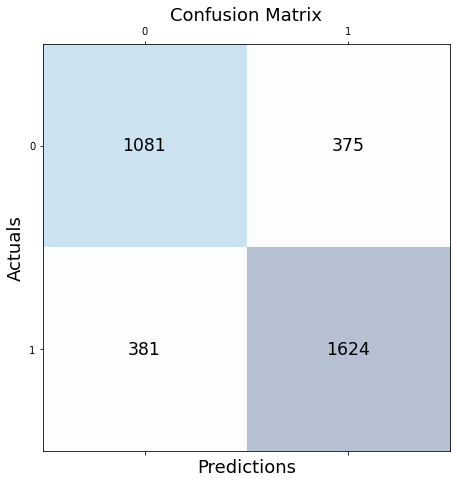

In [63]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [64]:
# predictions = cb.predict(test_final)
# predictions


In [65]:
# submission = pd.DataFrame({
#         "id": id,
#         "earning": predictions
#     })
# submission.to_csv('submission.csv', index=False)
# print('output was successfully saved')

In [66]:
# result = pd.read_csv('submission.csv')
# result.head(10)

#### I got a decent score of 0.84477 on private leaderboard.